# Chapter 2

## Question 10

Here we investigate the `Boston` dataset, which we need to pull out of the `MASS` dataset in R

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

First, read the data in and examine it. This would be done with `library(MASS)` in R, then examining `Boston`. Here we pull the data from sklearn's datasets module, then use the original docs to add headers.
```

    CRIM per capita crime rate by town
    ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS proportion of non-retail business acres per town
    CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX nitric oxides concentration (parts per 10 million)
    RM average number of rooms per dwelling
    AGE proportion of owner-occupied units built prior to 1940
    DIS weighted distances to five Boston employment centres
    RAD index of accessibility to radial highways
    TAX full-value property-tax rate per $10,000
    PTRATIO pupil-teacher ratio by town
    B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT % lower status of the population
    MEDV Median value of owner-occupied homes in $1000’s

 ```

In [2]:
boston = load_boston()
headers = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
           "RM", "AGE", "DIS", "RAD", "TAX",
           "PTRATIO", "B", "LSTAT", "MEDV"]
boston_array = np.concatenate((boston.data, boston.target[:, np.newaxis]), axis=1)

boston_dataframe = pd.DataFrame(data=boston_array, columns=headers)
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 Make some pairwise scatterplots of the predictors & describe your findings

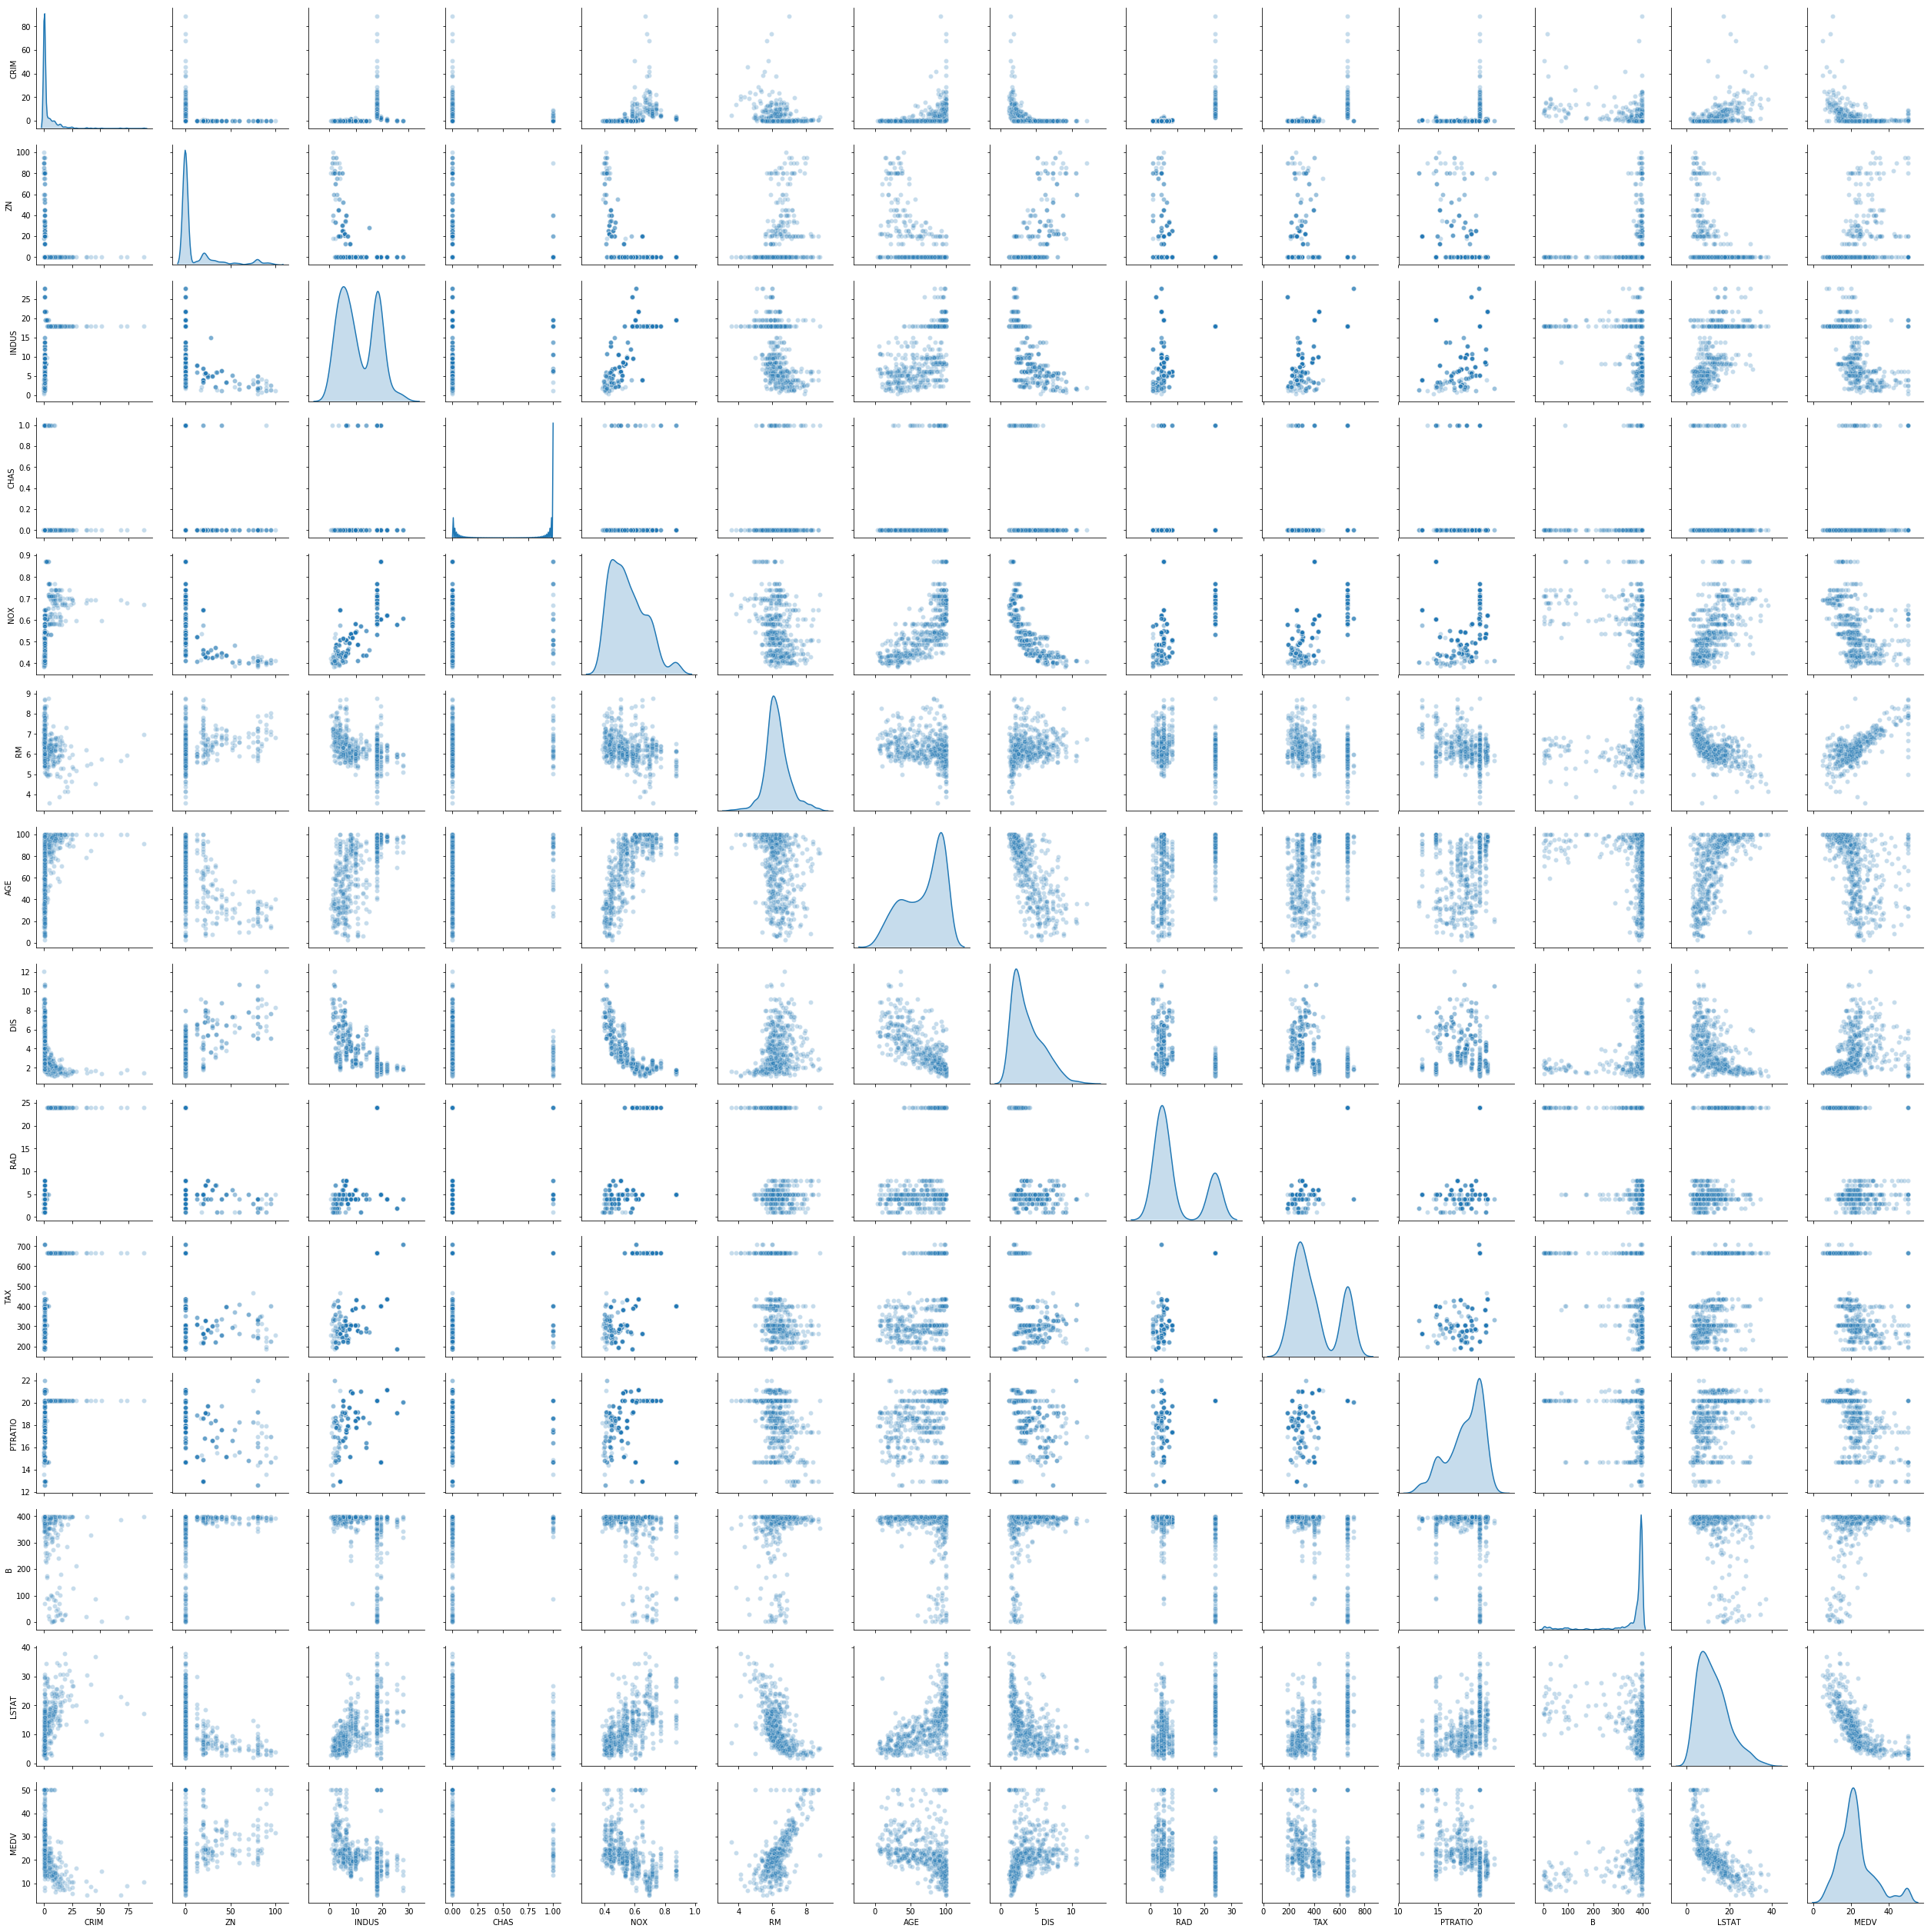

In [3]:
sns.pairplot(boston_dataframe, plot_kws=dict(alpha=0.25), diag_kind="kde")


Interesting things to focus on - 4th (CHAS) and 2nd to last (B ~ proportion of black people) columns have odd histograms. CHAS makes sense as it's a dummy variable, 1 if the tract touches the river and 0 otherwise. B is an oddly scaled variable so perhaps also makes sense

There aren't many big correlations in this dataset (it seems). Some vaguely correlated (by eye) 

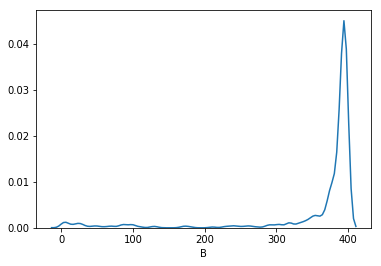

In [4]:
sns.distplot(boston_dataframe[boston_dataframe.columns[-3]], hist=False)

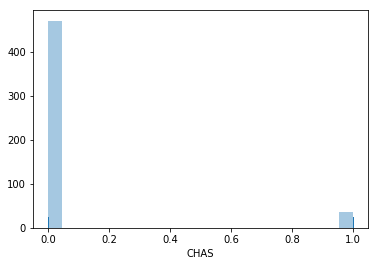

In [5]:
sns.distplot(boston_dataframe[boston_dataframe.columns[3]], kde=False, rug=True)

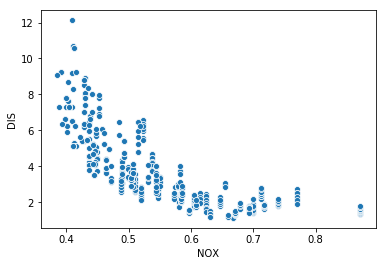

In [6]:
sns.scatterplot(x=boston_dataframe.NOX,
            y=boston_dataframe.DIS)

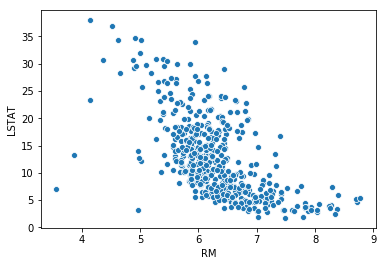

In [7]:
sns.scatterplot(x=boston_dataframe.RM,
            y=boston_dataframe.LSTAT)

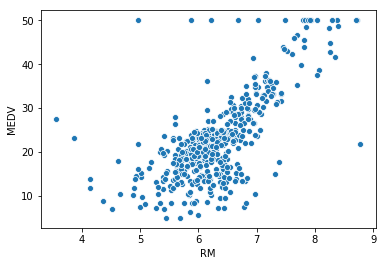

In [8]:
sns.scatterplot(x=boston_dataframe.RM,
            y=boston_dataframe.MEDV)

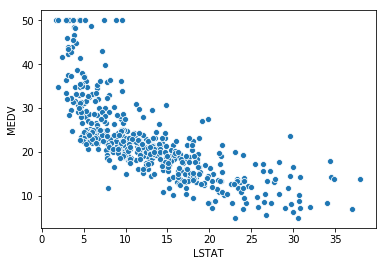

In [9]:
sns.scatterplot(x=boston_dataframe.LSTAT,
            y=boston_dataframe.MEDV)

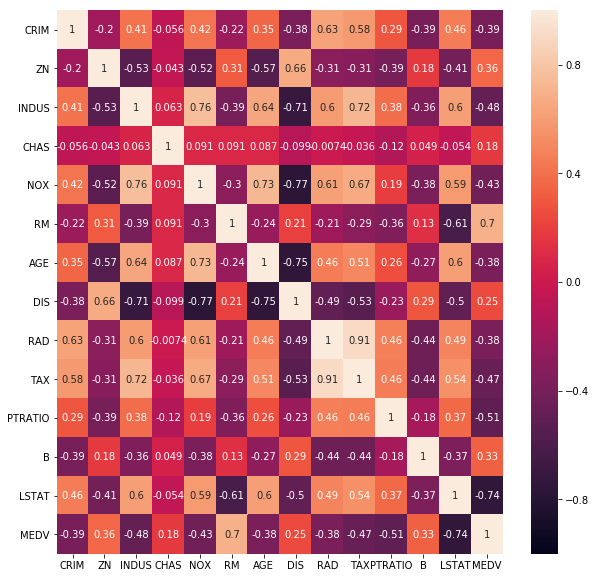

In [10]:
# get the correlation matrix
corr = boston_dataframe.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=+1, annot=True, ax=ax)

From the correlation graph:
    - NOX/INDUS
    - AGE/NOX
    - DIS/INDUS, DIS/NOX, DIS/AGE
    - TAX/INDUS, TAX/RAD
    - MEDV/RM
    - MEDV/LSAT
    
might be good to look at.

**What predictors are associated with the per-capita crime rate (CRIM)?** The CRIM histogram is sharply peaked around 0 which makes assessing this a bit difficult

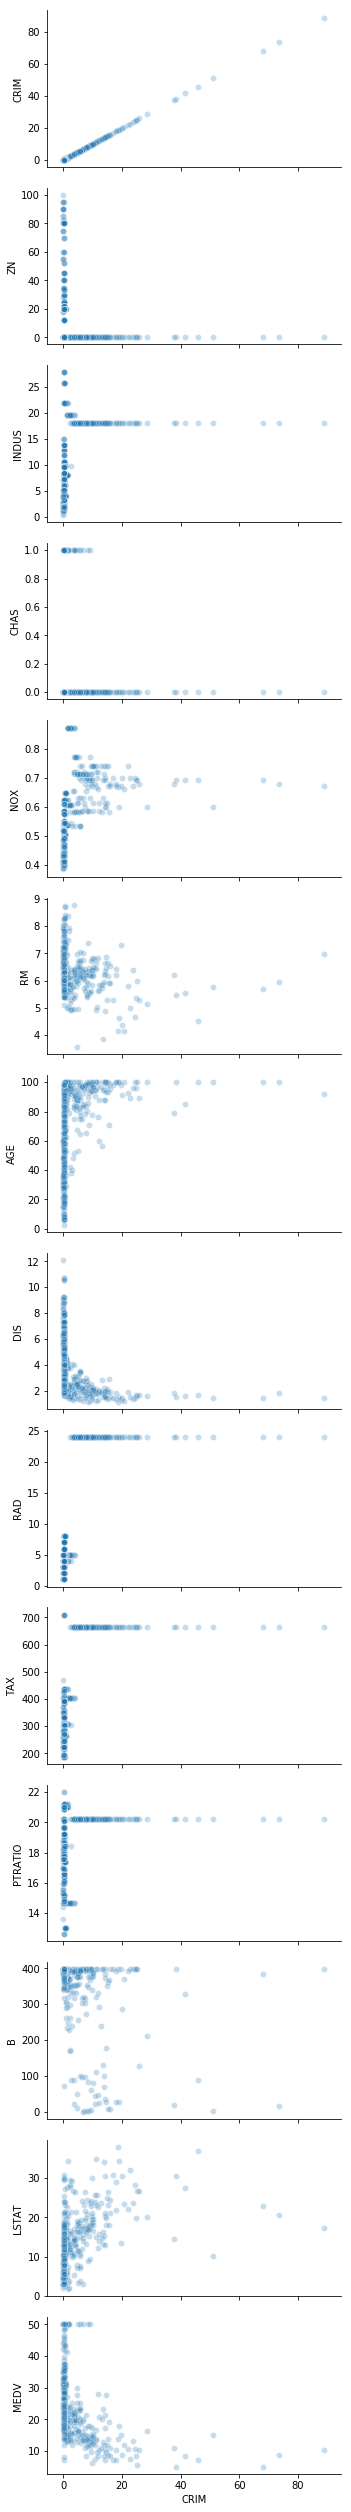

In [11]:
sns.pairplot(boston_dataframe, y_vars=boston_dataframe.columns, x_vars="CRIM", plot_kws=dict(alpha=0.25), diag_kind="kde", aspect=2)


RAD (Accessibility of radial highways) has the strongest correlation. RAD > 10 strongly implies a non-zero crime rate.

Visually, MEDV and CRIM have the most obvious association - house prices sharply drop with the per-capita crime rate.

**Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.**

In [12]:
ranges = boston_dataframe.max() - boston_dataframe.min() 
ranges.sort_values(ascending=False)

TAX        524.00000
B          396.58000
ZN         100.00000
AGE         97.10000
CRIM        88.96988
MEDV        45.00000
LSTAT       36.24000
INDUS       27.28000
RAD         23.00000
DIS         10.99690
PTRATIO      9.40000
RM           5.21900
CHAS         1.00000
NOX          0.48600
dtype: float64

The variability in ranges seems largely due to scaling of the variables.

In [13]:
bins = [0,10,20,30,40,50,60,70,80,90]
pd.cut(boston_dataframe.CRIM, bins=bins).value_counts().sort_index()

(0, 10]     452
(10, 20]     36
(20, 30]     10
(30, 40]      2
(40, 50]      2
(50, 60]      1
(60, 70]      1
(70, 80]      1
(80, 90]      1
Name: CRIM, dtype: int64

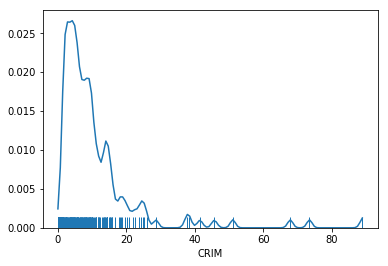

In [14]:
sns.distplot(boston_dataframe.CRIM, hist=False, rug=True, kde_kws={"cut": 0})

Almost all the suburbs have CRIM < 10, with a few outliers having much higher crime rates

In [15]:
bins = np.linspace(start=boston_dataframe.TAX.min(),
                   stop=boston_dataframe.TAX.max(),
                   num=10)

pd.cut(boston_dataframe.TAX, bins=bins).value_counts().sort_index()

(187.0, 245.222]       64
(245.222, 303.444]    107
(303.444, 361.667]    101
(361.667, 419.889]     67
(419.889, 478.111]     29
(478.111, 536.333]      0
(536.333, 594.556]      0
(594.556, 652.778]      0
(652.778, 711.0]      137
Name: TAX, dtype: int64

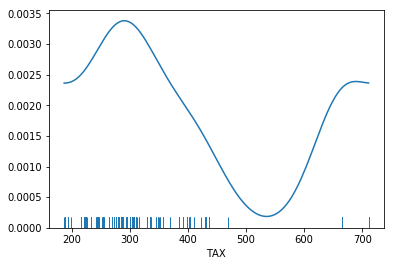

In [16]:
sns.distplot(boston_dataframe.TAX, hist=False, rug=True, kde_kws={"cut": 0})

Tax rate is very bimodal.

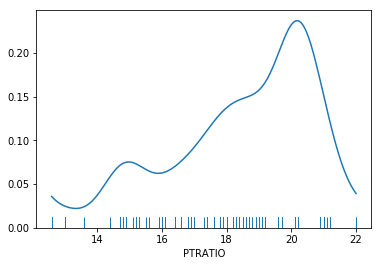

In [17]:
sns.distplot(boston_dataframe.PTRATIO, hist=False, rug=True,  kde_kws={"cut": 0})

Much less variability (factor of less than 2 between the numbers of pupils per teacher)

**How many of the suburbs in this data set bound the Charles
river?**

In [18]:
boston_dataframe.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

35 of the 506 suburbs bound the Charles river.

**What is the median pupil-teacher ratio among the towns in this
data set?**

In [19]:
boston_dataframe.PTRATIO.median()

19.05

**Which suburb of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings**


In [20]:
print(f"minimum value in $1000 is {boston_dataframe.MEDV.min()}")
print(f"this occurs in suburb with index {boston_dataframe.MEDV.idxmin()}")

minimum value in $1000 is 5.0
this occurs in suburb with index 398


In [21]:
lowest_price_row = boston_dataframe.iloc[398]

In [22]:
from scipy import stats
for val, col in zip(lowest_price_row, boston_dataframe.columns):
    arr = boston_dataframe[col]
    print(f"Percentile in {col}: {stats.percentileofscore(arr, val):.2f}")

Percentile in CRIM: 98.81
Percentile in ZN: 36.86
Percentile in INDUS: 75.79
Percentile in CHAS: 46.64
Percentile in NOX: 84.49
Percentile in RM: 7.71
Percentile in AGE: 95.85
Percentile in DIS: 5.73
Percentile in RAD: 87.06
Percentile in TAX: 86.07
Percentile in PTRATIO: 75.20
Percentile in B: 88.14
Percentile in LSTAT: 97.83
Percentile in MEDV: 0.30


I.e. the suburb with the lowest house prices has very high crime, percentage lower-status, and proportion of older buildings. It also has high NOX concentration and low accessibility to radial highways (?). It has low number of rooms per dwelling, and low distance to employment centres (?).

**In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.**

In [23]:
rooms_per_dwelling = boston_dataframe.RM

In [24]:
more_than_seven_rooms_per_dwelling = sum(rooms_per_dwelling>7) # , 'Yes', 'No')

In [25]:
print(more_than_seven_rooms_per_dwelling)

64


In [26]:
more_than_eight_rooms_per_dwelling = sum(rooms_per_dwelling>8) # , 'Yes', 'No')

In [27]:
print(more_than_eight_rooms_per_dwelling)

13


In [28]:
# Create a new column for these houses and do some pairplots, colouring according to >8 or <=8 RM
boston_dataframe["BigHouses"] = rooms_per_dwelling>8

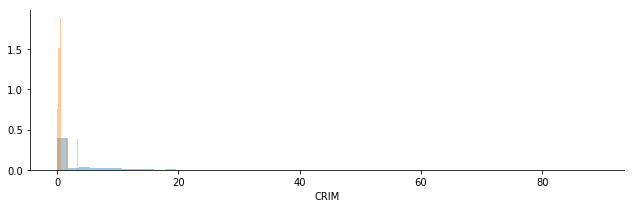

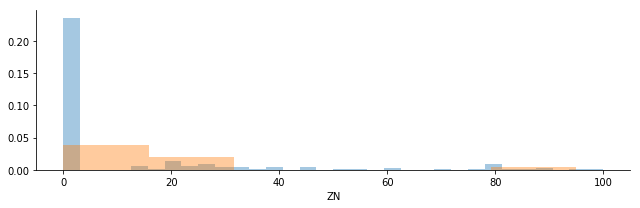

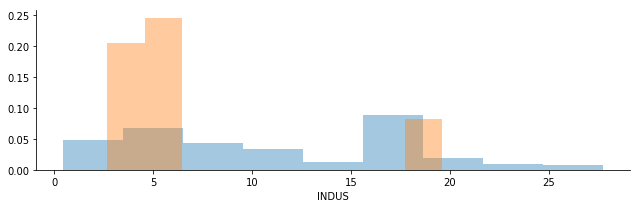

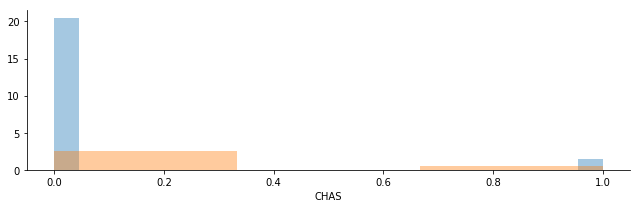

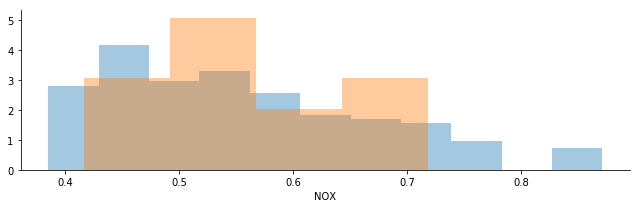

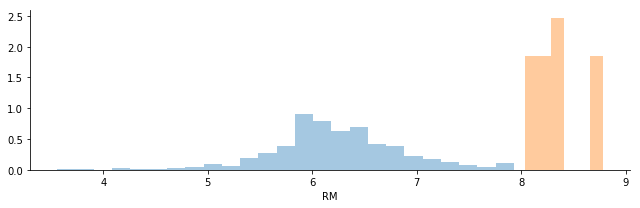

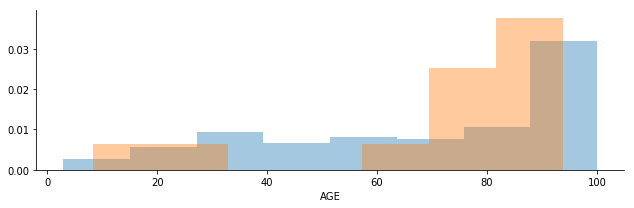

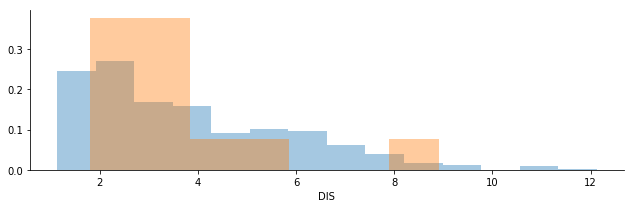

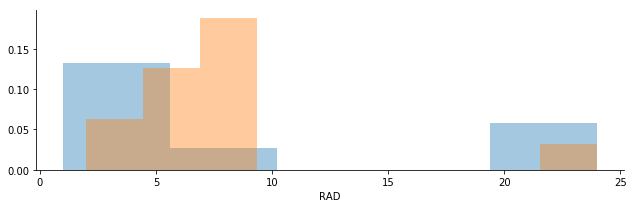

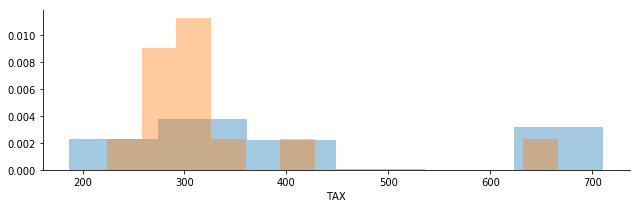

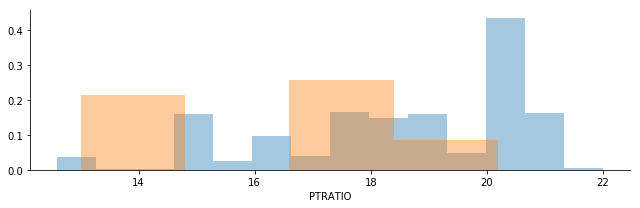

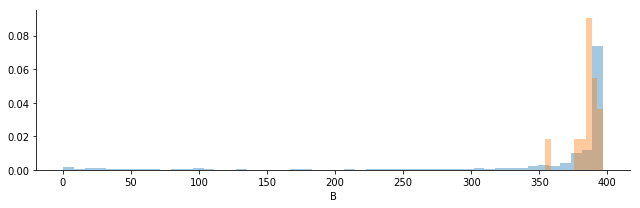

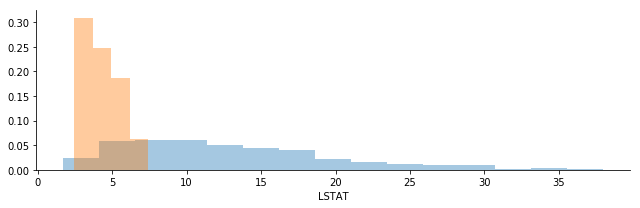

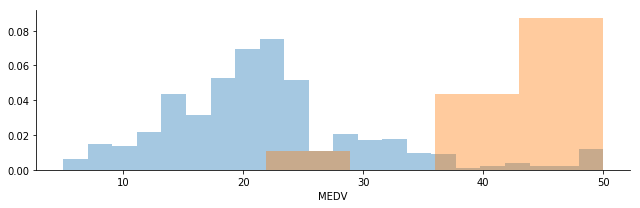

In [30]:
headers = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
           "RM", "AGE", "DIS", "RAD", "TAX",
           "PTRATIO", "B", "LSTAT", "MEDV"]

for col in headers:
    g = sns.FacetGrid(boston_dataframe, hue="BigHouses", aspect=3)
    g = g.map(sns.distplot, col, kde=False, hist=True, norm_hist=True) #, kde_kws={"cut":0})


Computing the K-L divergence would allow you to judge more properly where the graphs are different, but it's clear that house prices are lower, there are fewer low-status people, fewer black people, more teachers per pupil, greater accessibility,  newer buildings, less NOX, more large residential lots, and less crime, all as you might expect.
